In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import data_prep_functions as dat
import fp_plotting as fpp
from matplotlib import pyplot as plt
import xarray as xr
import matplotlib.colors
from scipy.signal import periodogram
from scipy.signal import welch
from scipy.stats import chi2
import datetime
import os

In [2]:
df = dat.adcp_data_merge('ADCP', 2000)
ds = dat.adcp_pd_to_xr(df)
ds

<xarray.Dataset>
Dimensions:    (height: 21, time: 136631)
Coordinates:
  * time       (time) object 2000-05-15T21:27:00+00:00 ... 2000-11-21T17:03:0...
  * height     (height) float64 0.6 2.6 3.6 4.6 5.6 ... 17.6 18.6 19.6 20.6 21.6
Data variables:
    northward  (time, height) float64 nan nan -0.008 -0.019 ... nan nan nan nan
    eastward   (time, height) float64 nan nan -0.1 -0.112 ... nan nan nan nan
    upwards    (time, height) float64 nan nan 0.001 0.001 ... nan nan nan nan
    intensity  (time, height) float64 nan 80.0 151.0 147.0 ... 80.0 95.0 107.0

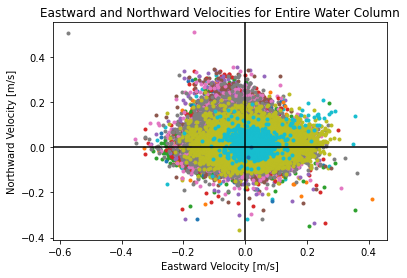

In [8]:
plt.figure()
plt.title('Eastward and Northward Velocities for Entire Water Column')
plt.plot(ds['eastward'],ds['northward'],'.')
plt.ylabel('Northward Velocity [m/s]')
plt.axvline(x=0,c='k')
plt.axhline(y=0,c='k')
plt.xlabel('Eastward Velocity [m/s]');